# 3 Pointers Made against shooting.csv

### Import packages

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from scipy.stats import pearsonr
import itertools

pd.set_option("display.max_columns", None)

### Set working directory

In [2]:
# Print working directory
cwd = os.getcwd()
print(f'Directory: {cwd}')

# Change working directory
os.chdir('/Users/tyler/OneDrive/Documents/Python/NBA')

# Print working directory
cwd = os.getcwd()
print(f'Directory: {cwd}')

Directory: C:\Users\tyler\OneDrive\Documents\Python\NBA\backend\analysis
Directory: C:\Users\tyler\OneDrive\Documents\Python\NBA


## Exploratory Data Analysis

### Import data

In [3]:
df = pd.read_csv('backend/data/shooting.csv').drop(['Unnamed: 0'], axis=1)

### Basic exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194138 entries, 0 to 194137
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      194138 non-null  object 
 1   visitor   194138 non-null  object 
 2   home      194138 non-null  object 
 3   team      194138 non-null  int64  
 4   quarter   194138 non-null  object 
 5   fg        194138 non-null  int64  
 6   fga       194138 non-null  int64  
 7   fg_perc   194138 non-null  float64
 8   2p        194138 non-null  int64  
 9   2pa       194138 non-null  int64  
 10  2p_perc   194135 non-null  float64
 11  3p        194138 non-null  int64  
 12  3pa       194138 non-null  int64  
 13  3p_perc   192676 non-null  float64
 14  efg_perc  194138 non-null  float64
 15  ast       194138 non-null  int64  
 16  ast_perc  194116 non-null  float64
dtypes: float64(5), int64(8), object(4)
memory usage: 25.2+ MB


In [5]:
df.sample(5)

,date,visitor,home,team,quarter,fg,fga,fg_perc,2p,2pa,2p_perc,3p,3pa,3p_perc,efg_perc,ast,ast_perc
54498,"Fri, Nov 12, 2010",Charlotte Bobcats,Washington Wizards,1,q4,7,21,0.333,6,15,0.400,1,6,0.167,0.357,5,0.714
60468,"Mon, Jan 31, 2011",Milwaukee Bucks,Los Angeles Clippers,0,total,37,75,0.493,32,57,0.561,5,18,0.278,0.527,25,0.676
187775,"Thu, Mar 11, 2021",Minnesota Timberwolves,New Orleans Pelicans,1,q1,13,26,0.500,12,20,0.600,1,6,0.167,0.519,9,0.692
111832,"Fri, Feb 6, 2015",Denver Nuggets,Detroit Pistons,0,total,33,85,0.388,28,63,0.444,5,22,0.227,0.418,22,0.667
25411,"Sat, Apr 12, 2008",Los Angeles Clippers,Golden State Warriors,1,q3,8,22,0.364,8,18,0.444,0,4,0.000,0.364,4,0.500


In [6]:
# Convert 'date' column to Date object
df['date'] = pd.to_datetime(df['date'])

# Conver 'team' column to Team Name
df['team'] = np.where(df['team'], df['home'], df['visitor'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194138 entries, 0 to 194137
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      194138 non-null  datetime64[ns]
 1   visitor   194138 non-null  object        
 2   home      194138 non-null  object        
 3   team      194138 non-null  object        
 4   quarter   194138 non-null  object        
 5   fg        194138 non-null  int64         
 6   fga       194138 non-null  int64         
 7   fg_perc   194138 non-null  float64       
 8   2p        194138 non-null  int64         
 9   2pa       194138 non-null  int64         
 10  2p_perc   194135 non-null  float64       
 11  3p        194138 non-null  int64         
 12  3pa       194138 non-null  int64         
 13  3p_perc   192676 non-null  float64       
 14  efg_perc  194138 non-null  float64       
 15  ast       194138 non-null  int64         
 16  ast_perc  194116 non-null  float64    

In [8]:
total_df = df[df['quarter'] == 'total']
q1_df = df[df['quarter'] == 'q1']
q2_df = df[df['quarter'] == 'q2']
q3_df = df[df['quarter'] == 'q3']
q4_df = df[df['quarter'] == 'q4']

In [9]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38288 entries, 4 to 194137
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      38288 non-null  datetime64[ns]
 1   visitor   38288 non-null  object        
 2   home      38288 non-null  object        
 3   team      38288 non-null  object        
 4   quarter   38288 non-null  object        
 5   fg        38288 non-null  int64         
 6   fga       38288 non-null  int64         
 7   fg_perc   38288 non-null  float64       
 8   2p        38288 non-null  int64         
 9   2pa       38288 non-null  int64         
 10  2p_perc   38288 non-null  float64       
 11  3p        38288 non-null  int64         
 12  3pa       38288 non-null  int64         
 13  3p_perc   38288 non-null  float64       
 14  efg_perc  38288 non-null  float64       
 15  ast       38288 non-null  int64         
 16  ast_perc  38288 non-null  float64       
dtypes: datetime

### 3 Pointer's Made vs Year (--)

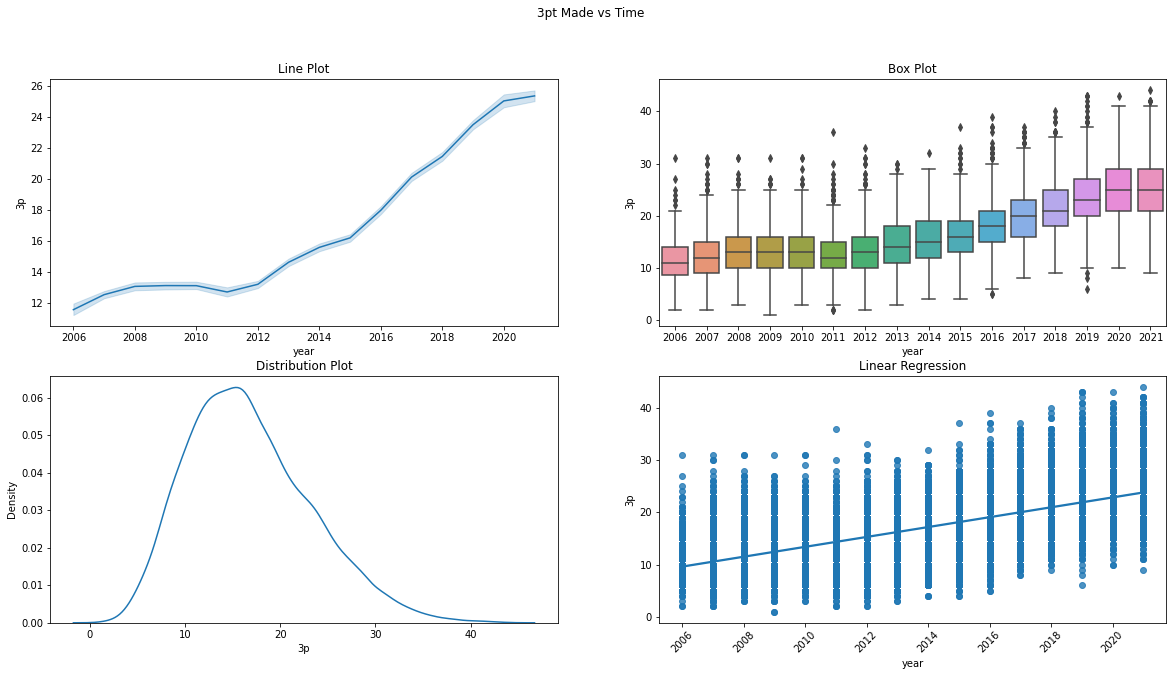

In [10]:
# Groupby and sum all statistics
totals = total_df.groupby(['date', 'visitor', 'home']).sum().reset_index()

# Create year and month columns
totals['year'] = totals['date'].dt.year
totals['month'] = totals['date'].dt.month

# Change plot size
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('3pt Made vs Time')
fig = plt.gcf()

# Plot lineplot of Total 3pt Made over Time
chart = sns.lineplot(x='year', y='3p', data=totals, ax= ax[0, 0]).set(title='Line Plot')

# Plot boxplot of Total 3pt Made over Time
chart = sns.boxplot(x='year', y='3p', data=totals, ax=ax[0, 1]).set(title= 'Box Plot')
plt.xticks(rotation=45)

# Plot distribution plot of Total 3pt Made over Time
chart = sns.kdeplot(x='3p', data=totals, ax=ax[1,0]).set(title='Distribution Plot')

# Plot linearregression of Total 3pt Made over Time
chart = sns.regplot(x='year', y='3p', data=totals, ax=ax[1, 1]).set(title='Linear Regression')

plt.show()

### 3 Pointer's Made vs Year (2015 - current)

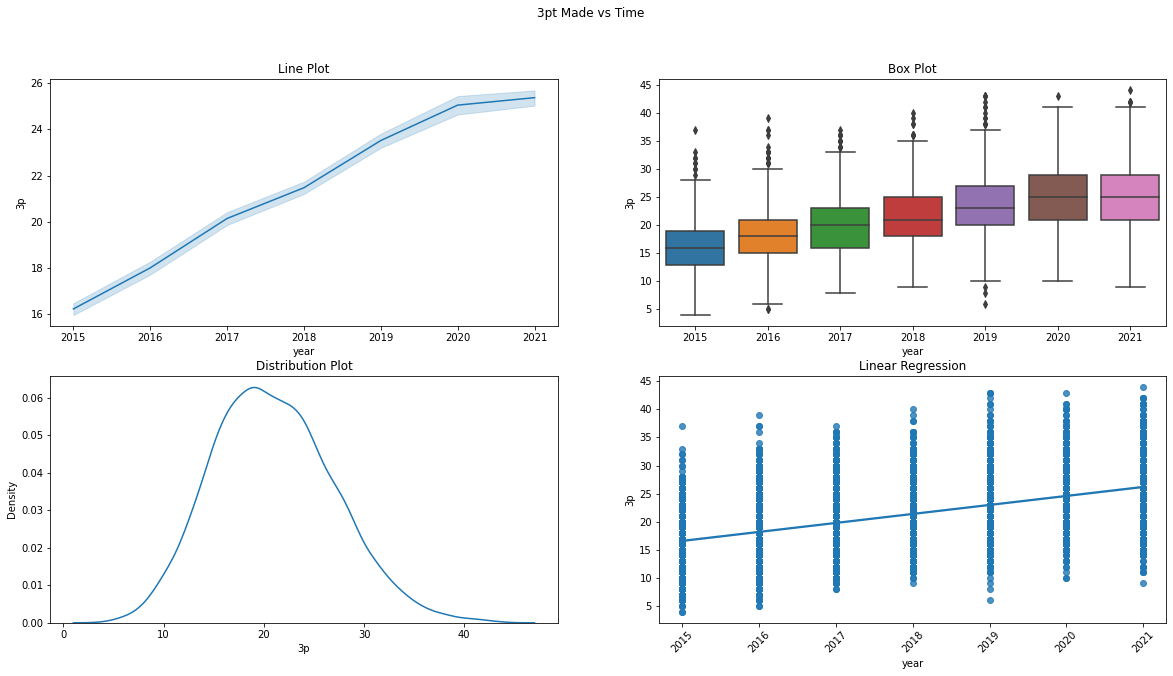

In [11]:
# Change plot size
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('3pt Made vs Time')
fig = plt.gcf()

year = 2015

# Plot lineplot of Total 3pt Made over Time
chart = sns.lineplot(x='year', y='3p', data=totals[totals['year'] >= year], ax= ax[0, 0]).set(title='Line Plot')

# Plot boxplot of Total 3pt Made over Time
chart = sns.boxplot(x='year', y='3p', data=totals[totals['year'] >= year], ax=ax[0, 1]).set(title= 'Box Plot')
plt.xticks(rotation=45)

# Plot distribution plot of Total 3pt Made over Time
chart = sns.kdeplot(x='3p', data=totals[totals['year'] >= year], ax=ax[1,0]).set(title='Distribution Plot')

# Plot linearregression of Total 3pt Made over Time
chart = sns.regplot(x='year', y='3p', data=totals[totals['year'] >= year], ax=ax[1, 1]).set(title='Linear Regression')

plt.xticks(rotation=45)
plt.show()

### 3 Pointer's Made vs FGA (2015 - current)

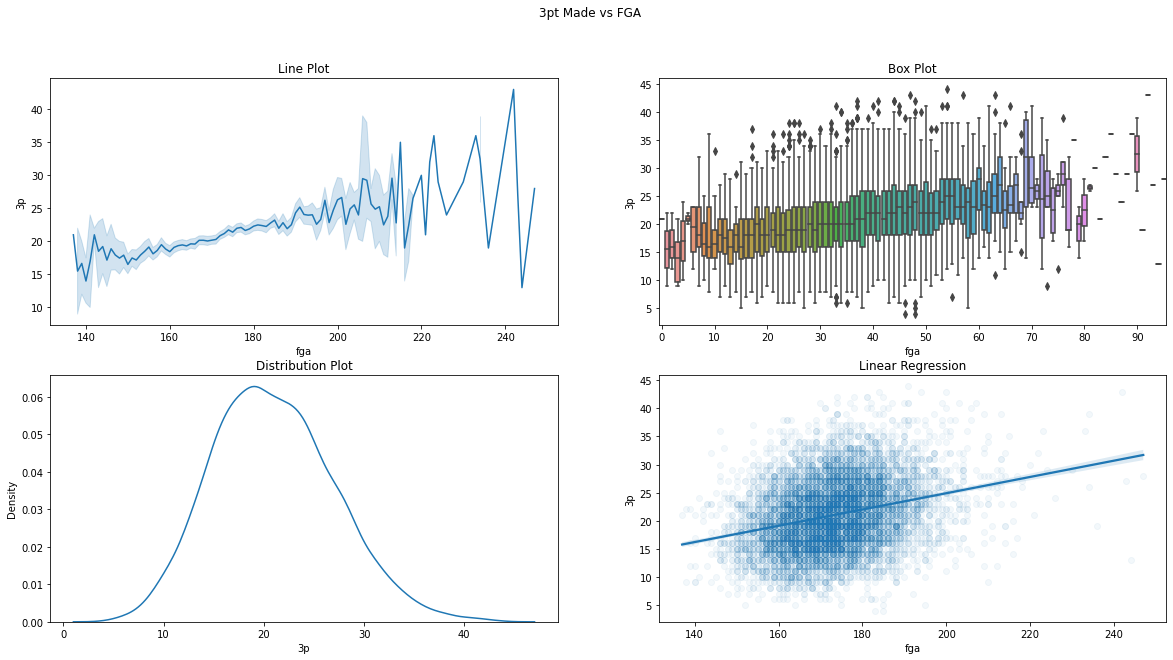

In [12]:
# Change plot size
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('3pt Made vs FGA')
fig = plt.gcf()

year = 2015

# Plot lineplot of Total 3pt Made over FGA
chart = sns.lineplot(x='fga', y='3p', data=totals[totals['year'] >= year], ax= ax[0, 0]).set(title='Line Plot')

# Plot boxplot of Total 3pt Made over FGA
chart = sns.boxplot(x='fga', y='3p', data=totals[totals['year'] >= year], ax=ax[0, 1]).set(title= 'Box Plot')
ax[0, 1].xaxis.set_major_locator(ticker.MultipleLocator(10))
ax[0, 1].xaxis.set_major_formatter(ticker.ScalarFormatter())

# Plot distribution plot of Total 3pt Made over FGA
chart = sns.kdeplot(x='3p', data=totals[totals['year'] >= year], ax=ax[1,0]).set(title='Distribution Plot')

# Plot linearregression of Total 3pt Made over FGA
chart = sns.regplot(x='fga', y='3p', data=totals[totals['year'] >= year], ax=ax[1, 1], scatter_kws={'alpha':0.05}).set(title='Linear Regression')

plt.show()

# Dataframe of team's last 15 performances

In [13]:
# Totals
total_df = df[df['quarter'] == 'total'].copy()

# Return ten lastest dates team played
def last_15_date(team, date):
    schedule = total_df[total_df['team'] == team].sort_values(by='date').reset_index()
    date_index = schedule[schedule['date'] == date].index[0]
    if date_index - 15 < 0:
        return None, None, None, None, None, None, None, None, None, None, None, None, None, None, None
    else:
        date_1, date_2 = schedule.iloc[date_index - 1]['date'], schedule.iloc[date_index - 2]['date']
        date_3, date_4 = schedule.iloc[date_index - 3]['date'], schedule.iloc[date_index - 4]['date']
        date_5, date_6 = schedule.iloc[date_index - 5]['date'], schedule.iloc[date_index - 6]['date']
        date_7, date_8 = schedule.iloc[date_index - 7]['date'], schedule.iloc[date_index - 8]['date']
        date_9, date_10 = schedule.iloc[date_index - 9]['date'], schedule.iloc[date_index - 10]['date']
        date_11, date_12 = schedule.iloc[date_index - 11]['date'], schedule.iloc[date_index - 12]['date']
        date_13, date_14 = schedule.iloc[date_index - 13]['date'], schedule.iloc[date_index - 14]['date']
        date_15 = schedule.iloc[date_index - 15]['date']
        return date_1, date_2, date_3, date_4, date_5, date_6, date_7, date_8, date_9, date_10, date_11, date_12, date_13, date_14, date_15

total_df['dates'] = total_df.apply(lambda x: last_15_date(x.team, x.date), axis=1)
total_df['date_1'], total_df['date_2'] = total_df['dates'].apply(lambda x: x[0]), total_df['dates'].apply(lambda x: x[1])
total_df['date_3'], total_df['date_4'] = total_df['dates'].apply(lambda x: x[2]), total_df['dates'].apply(lambda x: x[3])
total_df['date_5'], total_df['date_6'] = total_df['dates'].apply(lambda x: x[4]), total_df['dates'].apply(lambda x: x[5])
total_df['date_7'], total_df['date_8'] = total_df['dates'].apply(lambda x: x[6]), total_df['dates'].apply(lambda x: x[7])
total_df['date_9'], total_df['date_10'] = total_df['dates'].apply(lambda x: x[8]), total_df['dates'].apply(lambda x: x[9])
total_df['date_11'], total_df['date_12'] = total_df['dates'].apply(lambda x: x[10]), total_df['dates'].apply(lambda x: x[11])
total_df['date_13'], total_df['date_14'] = total_df['dates'].apply(lambda x: x[12]), total_df['dates'].apply(lambda x: x[13])
total_df['date_15'] = total_df['dates'].apply(lambda x: x[14])

In [14]:
# X and y column names to merge on
x_cols = ['date', 'team', 'fg', 'fga', 'fg_perc', '2p', '2pa', '2p_perc',
          '3p', '3pa', '3p_perc', 'efg_perc', 'ast', 'ast_perc']

last_15_games = total_df.copy()
last_15_games.loc[:, 'target'] = last_15_games.loc[:, '3p']
X = total_df[x_cols].copy()

# Dataframe of target (3pt made by each team) and of variables (last 5 games stats for each team)
dates = ['_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10', '_11', '_12', '_13', '_14', '_15']
for date in dates:
    last_15_games = pd.merge(last_15_games, X, left_on=['date' + date, 'team'], right_on=['date', 'team'], how='left', suffixes=('', date))

## Feature Engineering

In [15]:
# Create season variable
def season(month, year):
    if (month in list(range(10, 13)) and year == 2006) or (month in list(range(1, 7)) and year == 2007):
        return 2006
    elif (month in list(range(10, 13)) and year == 2007) or (month in list(range(1, 7)) and year == 2008):
        return 2007
    elif (month in list(range(10, 13)) and year == 2008) or (month in list(range(1, 7)) and year == 2009):
        return 2008
    elif (month in list(range(10, 13)) and year == 2009) or (month in list(range(1, 7)) and year == 2010):
        return 2009
    elif (month in list(range(10, 13)) and year == 2010) or (month in list(range(1, 7)) and year == 2011):
        return 2010
    elif (month in list(range(10, 11)) and year == 2011) or (month in list(range(1, 7)) and year == 2012):
        return 2011
    elif (month in list(range(10, 13)) and year == 2012) or (month in list(range(1, 7)) and year == 2013):
        return 2012
    elif (month in list(range(10, 13)) and year == 2013) or (month in list(range(1, 7)) and year == 2014):
        return 2013
    elif (month in list(range(10, 13)) and year == 2014) or (month in list(range(1, 7)) and year == 2015):
        return 2014
    elif (month in list(range(10, 13)) and year == 2015) or (month in list(range(1, 7)) and year == 2016):
        return 2015
    elif (month in list(range(10, 13)) and year == 2016) or (month in list(range(1, 7)) and year == 2017):
        return 2016
    elif (month in list(range(10, 13)) and year == 2017) or (month in list(range(1, 7)) and year == 2018):
        return 2017
    elif (month in list(range(10, 13)) and year == 2018) or (month in list(range(1, 7)) and year == 2019):
        return 2018
    elif (month in list(range(10, 13)) and year == 2019) or (month in list(range(1, 11)) and year == 2020):
        return 2019
    elif (month in list(range(12, 13)) and year == 2020) or (month in list(range(1, 8)) and year == 2021):
        return 2020

total_df['season'] = total_df['date'].apply(lambda x: season(x.month, x.year))
last_15_games['season'] = last_15_games['date'].apply(lambda x: season(x.month, x.year))
last_15_games.sample()

,date,visitor,home,team,quarter,fg,fga,fg_perc,2p,2pa,2p_perc,3p,3pa,3p_perc,efg_perc,ast,ast_perc,dates,date_1,date_2,date_3,date_4,date_5,date_6,date_7,date_8,date_9,date_10,date_11,date_12,date_13,date_14,date_15,target,date_1,fg_1,fga_1,fg_perc_1,2p_1,2pa_1,2p_perc_1,3p_1,3pa_1,3p_perc_1,efg_perc_1,ast_1,ast_perc_1,date_2,fg_2,fga_2,fg_perc_2,2p_2,2pa_2,2p_perc_2,3p_2,3pa_2,3p_perc_2,efg_perc_2,ast_2,ast_perc_2,date_3,fg_3,fga_3,fg_perc_3,2p_3,2pa_3,2p_perc_3,3p_3,3pa_3,3p_perc_3,efg_perc_3,ast_3,ast_perc_3,date_4,fg_4,fga_4,fg_perc_4,2p_4,2pa_4,2p_perc_4,3p_4,3pa_4,3p_perc_4,efg_perc_4,ast_4,ast_perc_4,date_5,fg_5,fga_5,fg_perc_5,2p_5,2pa_5,2p_perc_5,3p_5,3pa_5,3p_perc_5,efg_perc_5,ast_5,ast_perc_5,date_6,fg_6,fga_6,fg_perc_6,2p_6,2pa_6,2p_perc_6,3p_6,3pa_6,3p_perc_6,efg_perc_6,ast_6,ast_perc_6,date_7,fg_7,fga_7,fg_perc_7,2p_7,2pa_7,2p_perc_7,3p_7,3pa_7,3p_perc_7,efg_perc_7,ast_7,ast_perc_7,date_8,fg_8,fga_8,fg_perc_8,2p_8,2pa_8,2p_perc_8,3p_8,3pa_8,3p_perc_8,efg_perc_8,ast_8,ast_perc_8,date_9,fg_9,fga_9,fg_perc_9,2p_9,2pa_9,2p_perc_9,3p_9,3pa_9,3p_perc_9,efg_perc_9,ast_9,ast_perc_9,date_10,fg_10,fga_10,fg_perc_10,2p_10,2pa_10,2p_perc_10,3p_10,3pa_10,3p_perc_10,efg_perc_10,ast_10,ast_perc_10,date_11,fg_11,fga_11,fg_perc_11,2p_11,2pa_11,2p_perc_11,3p_11,3pa_11,3p_perc_11,efg_perc_11,ast_11,ast_perc_11,date_12,fg_12,fga_12,fg_perc_12,2p_12,2pa_12,2p_perc_12,3p_12,3pa_12,3p_perc_12,efg_perc_12,ast_12,ast_perc_12,date_13,fg_13,fga_13,fg_perc_13,2p_13,2pa_13,2p_perc_13,3p_13,3pa_13,3p_perc_13,efg_perc_13,ast_13,ast_perc_13,date_14,fg_14,fga_14,fg_perc_14,2p_14,2pa_14,2p_perc_14,3p_14,3pa_14,3p_perc_14,efg_perc_14,ast_14,ast_perc_14,date_15,fg_15,fga_15,fg_perc_15,2p_15,2pa_15,2p_perc_15,3p_15,3pa_15,3p_perc_15,efg_perc_15,ast_15,ast_perc_15,season
29409,2017-12-26,Indiana Pacers,Detroit Pistons,Detroit Pistons,total,41,82,0.5,29,48,0.604,12,34,0.353,0.573,26,0.634,"(2017-12-22 00:00:00, 2017-12-20 00:00:00, 201...",2017-12-22,2017-12-20,2017-12-17,2017-12-15,2017-12-14,2017-12-12,2017-12-10,2017-12-08,2017-12-06,2017-12-04,2017-12-02,2017-12-01,2017-11-29,2017-11-27,2017-11-24,12,2017-12-22,38.0,88.0,0.432,28.0,63.0,0.444,10.0,25.0,0.4,0.489,19.0,0.5,2017-12-20,33.0,77.0,0.429,26.0,53.0,0.491,7.0,24.0,0.292,0.474,19.0,0.576,2017-12-17,42.0,88.0,0.477,25.0,54.0,0.463,17.0,34.0,0.5,0.574,27.0,0.643,2017-12-15,39.0,93.0,0.419,26.0,61.0,0.426,13.0,32.0,0.406,0.489,22.0,0.564,2017-12-14,41.0,90.0,0.456,28.0,60.0,0.467,13.0,30.0,0.433,0.528,26.0,0.634,2017-12-12,28.0,79.0,0.354,19.0,54.0,0.352,9.0,25.0,0.36,0.411,17.0,0.607,2017-12-10,28.0,84.0,0.333,18.0,51.0,0.353,10.0,33.0,0.303,0.393,14.0,0.5,2017-12-08,38.0,92.0,0.413,26.0,65.0,0.4,12.0,27.0,0.444,0.478,20.0,0.526,2017-12-06,36.0,87.0,0.414,26.0,57.0,0.456,10.0,30.0,0.333,0.471,20.0,0.556,2017-12-04,35.0,85.0,0.412,27.0,58.0,0.466,8.0,27.0,0.296,0.459,15.0,0.429,2017-12-02,34.0,78.0,0.436,25.0,47.0,0.532,9.0,31.0,0.29,0.494,20.0,0.588,2017-12-01,35.0,79.0,0.443,26.0,49.0,0.531,9.0,30.0,0.3,0.5,20.0,0.571,2017-11-29,51.0,89.0,0.573,38.0,61.0,0.623,13.0,28.0,0.464,0.646,31.0,0.608,2017-11-27,44.0,85.0,0.518,33.0,60.0,0.55,11.0,25.0,0.44,0.582,26.0,0.591,2017-11-24,39.0,84.0,0.464,25.0,47.0,0.532,14.0,37.0,0.378,0.548,22.0,0.564,2017.0


In [27]:
# Calculate z-score
def z_score(value, mean, std):
    return (value - mean) / std

In [63]:
# Calculate perc difference
def perc_diff(value, mean):
    return (value - mean) / mean

### Last Performance

In [77]:
stats = ['fg', 'fga', 'fg_perc', '2p', '2pa', '2p_perc', '3p', '3pa', '3p_perc', 'efg_perc', 'ast', 'ast_perc']
dates = ['_1']
cols = ['date', 'visitor', 'home', 'team', 'target'] + \
    [tup[0] + tup[1] for tup in list(itertools.product(stats, dates))]

last_game = last_15_games[cols].copy()

# Calculate mean for each stat over a team's last performance
for stat in stats:
    last_game[stat] = 0
    for date in dates:
        last_game[stat] = last_game[stat] + last_game[stat + date]
    
    last_game[stat] = last_game[stat] / len(dates)
    
# Calculate standard deviation for each stat over a team's performance
for stat in stats:
    last_game[stat + '_std'] = 0
    for date in dates:
        last_game[stat + '_std'] = last_game[stat + '_std'] + ((last_game[stat + date] - last_game[stat]) ** 2)
    
    last_game[stat + '_std'] = last_game[stat + '_std'] / len(dates)
    last_game[stat + '_std'] = last_game[stat + '_std'] ** .5

# Feature engineer trends
for stat in stats:
    last_game[stat + '_trend'] = 0
    for date in dates:
        last_game[stat + '_trend'] = last_game[stat + '_trend'] + \
                                        z_score(last_game[stat + date], last_game[stat], last_game[stat + '_std']).fillna(0)
    
    last_game[stat + '_trend'] = last_game[stat + '_trend'] / 1


# Aggregate stats for the entire game
last_game = last_game.groupby(['date', 'visitor', 'home']).aggregate(['mean', 'sum'])

last_game_cols = [col 
                  for col in last_game.columns
                  if (col[0] == 'target' and col[1] == 'sum') or \
                     (col[0] in stats and col[1] == 'sum' and '_perc' not in col[0]) or \
                     (col[0] in stats and col[1] == 'mean' and '_perc' in col[0]) or \
                     ('_trend' in col[0] and col[1] == 'sum')]

last_game = last_game[last_game_cols].dropna(axis=0)
last_game.columns = [col[0] for col in last_game.columns]
last_game.head()

target    fg    fga  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers      13  40.0   79.0   
           New York Knicks Chicago Bulls                9  34.0   73.0   
2006-11-29 Indiana Pacers  Golden State Warriors       18  79.0  156.0   
           New York Knicks Cleveland Cavaliers         13  33.0   69.0   
           Orlando Magic   Seattle SuperSonics          8  63.0  162.0   

                                                   fg_perc    2p    2pa  \
date       visitor         home                                           
2006-11-28 Indiana Pacers  Portland Trail Blazers   0.5060  32.0   67.0   
           New York Knicks Chicago Bulls            0.4660  31.0   64.0   
2006-11-29 Indiana Pacers  Golden State Warriors    0.5075  61.0  115.0   
           New York Knicks Cleveland Cavaliers      0.4780  31.0   60.0   
           Orlando Magic   Seattle SuperSonics      0.3895  60.0  141.0   

                                                   2p_perc    3p   3pa  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers   0.4780   8.0  12.0   
           New York Knicks Chicago Bulls            0.4840   3.0   9.0   
2006-11-29 Indiana Pacers  Golden State Warriors    0.5385  18.0  41.0   
           New York Knicks Cleveland Cavaliers      0.5170   2.0   9.0   
           Orlando Magic   Seattle SuperSonics      0.4260   3.0  21.0   

                                                   3p_perc  efg_perc   ast  \
date       visitor         home                                              
2006-11-28 Indiana Pacers  Portland Trail Blazers    0.667     0.557  22.0   
           New York Knicks Chicago Bulls             0.333     0.486  19.0   
2006-11-29 Indiana Pacers  Golden State Warriors     0.452     0.565  55.0   
           New York Knicks Cleveland Cavaliers       0.222     0.493  19.0   
           Orlando Magic   Seattle SuperSonics       0.141     0.399  28.0   

                                                   ast_perc  fg_trend  \
date       visitor         home                                         
2006-11-28 Indiana Pacers  Portland Trail Blazers     0.550       0.0   
           New York Knicks Chicago Bulls              0.559       0.0   
2006-11-29 Indiana Pacers  Golden State Warriors      0.698       0.0   
           New York Knicks Cleveland Cavaliers        0.576       0.0   
           Orlando Magic   Seattle SuperSonics        0.441       0.0   

                                                   fga_trend  fg_perc_trend  \
date       visitor         home                                               
2006-11-28 Indiana Pacers  Portland Trail Blazers        0.0            0.0   
           New York Knicks Chicago Bulls                 0.0            0.0   
2006-11-29 Indiana Pacers  Golden State Warriors         0.0            0.0   
           New York Knicks Cleveland Cavaliers           0.0            0.0   
           Orlando Magic   Seattle SuperSonics           0.0            0.0   

                                                   2p_trend  2pa_trend  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers       0.0        0.0   
           New York Knicks Chicago Bulls                0.0        0.0   
2006-11-29 Indiana Pacers  Golden State Warriors        0.0        0.0   
           New York Knicks Cleveland Cavaliers          0.0        0.0   
           Orlando Magic   Seattle SuperSonics          0.0        0.0   

                                                   2p_perc_trend  3p_trend  \
date       visitor         home                                              
2006-11-28 Indiana Pacers  Portland Trail Blazers            0.0       0.0   
           New York Knicks Chicago Bulls                     0.0       0.0   
2006-11-29 Indiana Pacers  Golden State War

### Last 5 Performances

In [78]:
stats = ['fg', 'fga', 'fg_perc', '2p', '2pa', '2p_perc', '3p', '3pa', '3p_perc', 'efg_perc', 'ast', 'ast_perc']
dates = ['_1', '_2', '_3', '_4', '_5']
cols = ['date', 'visitor', 'home', 'team', 'target'] + \
    [tup[0] + tup[1] for tup in list(itertools.product(stats, dates))]

last_5_games = last_15_games[cols].copy()

# Calculate mean for each stat over a team's last performance
for stat in stats:
    last_5_games[stat] = 0
    for date in dates:
        last_5_games[stat] = last_5_games[stat] + last_5_games[stat + date]
    
    last_5_games[stat] = last_5_games[stat] / len(dates)
    
# Calculate standard deviation for each stat over a team's performance
for stat in stats:
    last_5_games[stat + '_std'] = 0
    for date in dates:
        last_5_games[stat + '_std'] = last_5_games[stat + '_std'] + ((last_5_games[stat + date] - last_5_games[stat]) ** 2)
    
    last_5_games[stat + '_std'] = last_5_games[stat + '_std'] / len(dates)
    last_5_games[stat + '_std'] = last_5_games[stat + '_std'] ** .5

# Feature engineer trends
for stat in stats:
    last_5_games[stat + '_trend'] = 0
    for date in dates[:3]:
        last_5_games[stat + '_trend'] = last_5_games[stat + '_trend'] + \
                                        z_score(last_5_games[stat + date], last_5_games[stat], last_5_games[stat + '_std']).fillna(0)
    
    last_5_games[stat + '_trend'] = last_5_games[stat + '_trend'] / len(dates[:3])

last_5_games = last_5_games.groupby(['date', 'visitor', 'home']).aggregate(['mean', 'sum'])

last_5_game_cols = [col 
                    for col in last_5_games.columns
                    if (col[0] == 'target' and col[1] == 'sum') or \
                       (col[0] in stats and col[1] == 'sum' and '_perc' not in col[0]) or \
                       (col[0] in stats and col[1] == 'mean' and '_perc' in col[0]) or \
                       ('_trend' in col[0] and col[1] == 'sum')]

last_5_games = last_5_games[last_5_game_cols].dropna(axis=0)
last_5_games.columns = [col[0] for col in last_5_games.columns]
last_5_games.head()

target    fg    fga  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers      13  35.6   73.8   
           New York Knicks Chicago Bulls                9  33.2   77.2   
2006-11-29 Indiana Pacers  Golden State Warriors       18  76.4  166.6   
           New York Knicks Cleveland Cavaliers         13  33.0   73.8   
           Orlando Magic   Seattle SuperSonics          8  69.4  158.2   

                                                   fg_perc    2p    2pa  \
date       visitor         home                                           
2006-11-28 Indiana Pacers  Portland Trail Blazers   0.4814  30.4   58.8   
           New York Knicks Chicago Bulls            0.4342  29.0   63.6   
2006-11-29 Indiana Pacers  Golden State Warriors    0.4565  61.8  125.0   
           New York Knicks Cleveland Cavaliers      0.4508  30.0   62.6   
           Orlando Magic   Seattle SuperSonics      0.4396  60.2  127.6   

                                                   2p_perc    3p   3pa  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers   0.5186   5.2  15.0   
           New York Knicks Chicago Bulls            0.4592   4.2  13.6   
2006-11-29 Indiana Pacers  Golden State Warriors    0.4945  14.6  41.6   
           New York Knicks Cleveland Cavaliers      0.4826   3.0  11.2   
           Orlando Magic   Seattle SuperSonics      0.4728   9.2  30.6   

                                                   3p_perc  efg_perc   ast  \
date       visitor         home                                              
2006-11-28 Indiana Pacers  Portland Trail Blazers   0.3644    0.5164  19.0   
           New York Knicks Chicago Bulls            0.2994    0.4608  17.2   
2006-11-29 Indiana Pacers  Golden State Warriors    0.3573    0.5002  47.8   
           New York Knicks Cleveland Cavaliers      0.2676    0.4710  17.2   
           Orlando Magic   Seattle SuperSonics      0.2888    0.4686  36.2   

                                                   ast_perc  fg_trend  \
date       visitor         home                                         
2006-11-28 Indiana Pacers  Portland Trail Blazers    0.5378  0.209609   
           New York Knicks Chicago Bulls             0.5160  0.136083   
2006-11-29 Indiana Pacers  Golden State Warriors     0.6295 -0.159638   
           New York Knicks Cleveland Cavaliers       0.5194  0.745356   
           Orlando Magic   Seattle SuperSonics       0.5204  0.248282   

                                                   fga_trend  fg_perc_trend  \
date       visitor         home                                               
2006-11-28 Indiana Pacers  Portland Trail Blazers   0.373632      -0.128980   
           New York Knicks Chicago Bulls           -0.791349       0.728584   
2006-11-29 Indiana Pacers  Golden State Warriors   -0.880758       0.103304   
           New York Knicks Cleveland Cavaliers     -0.590872       0.690920   
           Orlando Magic   Seattle SuperSonics      0.987936      -0.473541   

                                                   2p_trend  2pa_trend  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers -0.023224   0.181402   
           New York Knicks Chicago Bulls           0.745356  -0.577920   
2006-11-29 Indiana Pacers  Golden State Warriors  -0.192625  -0.383482   
           New York Knicks Cleveland Cavaliers     0.608581  -0.561514   
           Orlando Magic   Seattle SuperSonics     0.361605   0.997066   

                                                   2p_perc_trend  3p_trend  \
date       visitor         home                                              
2006-11-28 Indiana Pacers  Portland Trail Blazers      -0.400018  0.544331   
           New York Knicks Chicago Bulls                0.751105 -0.588348   
2006-11-29 Indiana Pacers  Golden State War

### Last 10 Perfomances

In [79]:
stats = ['fg', 'fga', 'fg_perc', '2p', '2pa', '2p_perc', '3p', '3pa', '3p_perc', 'efg_perc', 'ast', 'ast_perc']
dates = ['_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10']
cols = ['date', 'visitor', 'home', 'team', 'target'] + \
    [tup[0] + tup[1] for tup in list(itertools.product(stats, dates))]

last_10_games = last_15_games[cols].copy()

# Calculate mean for each stat over a team's last performance
for stat in stats:
    last_10_games[stat] = 0
    for date in dates:
        last_10_games[stat] = last_10_games[stat] + last_10_games[stat + date]
    
    last_10_games[stat] = last_10_games[stat] / len(dates)
    
# Calculate standard deviation for each stat over a team's performance
for stat in stats:
    last_10_games[stat + '_std'] = 0
    for date in dates:
        last_10_games[stat + '_std'] = last_10_games[stat + '_std'] + ((last_10_games[stat + date] - last_10_games[stat]) ** 2)
    
    last_10_games[stat + '_std'] = last_10_games[stat + '_std'] / len(dates)
    last_10_games[stat + '_std'] = last_10_games[stat + '_std'] ** .5

# Feature engineer trends
for stat in stats:
    last_10_games[stat + '_trend'] = 0
    for date in dates[:5]:
        last_10_games[stat + '_trend'] = last_10_games[stat + '_trend'] + \
                                        z_score(last_10_games[stat + date], last_10_games[stat], last_10_games[stat + '_std']).fillna(0)
    
    last_10_games[stat + '_trend'] = last_10_games[stat + '_trend'] / len(dates[:5])

last_10_games = last_10_games.groupby(['date', 'visitor', 'home']).aggregate(['mean', 'sum'])

last_10_game_cols = [col 
                    for col in last_10_games.columns
                    if (col[0] == 'target' and col[1] == 'sum') or \
                       (col[0] in stats and col[1] == 'sum' and '_perc' not in col[0]) or \
                       (col[0] in stats and col[1] == 'mean' and '_perc' in col[0]) or \
                       ('_trend' in col[0] and col[1] == 'sum')]

last_10_games = last_10_games[last_10_game_cols].dropna(axis=0)
last_10_games.columns = [col[0] for col in last_10_games.columns]
last_10_games.head()

target    fg    fga  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers      13  33.5   73.6   
           New York Knicks Chicago Bulls                9  35.3   78.6   
2006-11-29 Indiana Pacers  Golden State Warriors       18  75.7  163.8   
           New York Knicks Cleveland Cavaliers         13  35.1   77.4   
           Orlando Magic   Seattle SuperSonics          8  72.4  157.7   

                                                   fg_perc    2p    2pa  \
date       visitor         home                                           
2006-11-28 Indiana Pacers  Portland Trail Blazers  0.45450  28.7   59.1   
           New York Knicks Chicago Bulls           0.45110  30.4   63.1   
2006-11-29 Indiana Pacers  Golden State Warriors   0.46185  60.2  121.8   
           New York Knicks Cleveland Cavaliers     0.45570  30.6   62.9   
           Orlando Magic   Seattle SuperSonics     0.46050  62.7  128.0   

                                                   2p_perc    3p   3pa  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers   0.4869   4.8  14.5   
           New York Knicks Chicago Bulls            0.4837   4.9  15.5   
2006-11-29 Indiana Pacers  Golden State Warriors    0.4966  15.5  42.0   
           New York Knicks Cleveland Cavaliers      0.4886   4.5  14.5   
           Orlando Magic   Seattle SuperSonics      0.4909   9.7  29.7   

                                                   3p_perc  efg_perc   ast  \
date       visitor         home                                              
2006-11-28 Indiana Pacers  Portland Trail Blazers  0.34650   0.48690  17.8   
           New York Knicks Chicago Bulls           0.30350   0.48180  17.4   
2006-11-29 Indiana Pacers  Golden State Warriors   0.36925   0.50960  49.3   
           New York Knicks Cleveland Cavaliers     0.29410   0.48420  17.8   
           Orlando Magic   Seattle SuperSonics     0.32570   0.49135  37.0   

                                                   ast_perc  fg_trend  \
date       visitor         home                                         
2006-11-28 Indiana Pacers  Portland Trail Blazers   0.53190  0.572609   
           New York Knicks Chicago Bulls            0.49240 -0.816805   
2006-11-29 Indiana Pacers  Golden State Warriors    0.65500  0.160212   
           New York Knicks Cleveland Cavaliers      0.50710 -0.788672   
           Orlando Magic   Seattle SuperSonics      0.51075 -0.873670   

                                                   fga_trend  fg_perc_trend  \
date       visitor         home                                               
2006-11-28 Indiana Pacers  Portland Trail Blazers   0.046324       0.822568   
           New York Knicks Chicago Bulls           -0.249682      -0.392886   
2006-11-29 Indiana Pacers  Golden State Warriors    0.337050      -0.155317   
           New York Knicks Cleveland Cavaliers     -0.579141      -0.113463   
           Orlando Magic   Seattle SuperSonics      0.138988      -1.073659   

                                                   2p_trend  2pa_trend  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers  0.554184  -0.053292   
           New York Knicks Chicago Bulls          -0.513265   0.119557   
2006-11-29 Indiana Pacers  Golden State Warriors   0.311072   0.318007   
           New York Knicks Cleveland Cavaliers    -0.222988  -0.070148   
           Orlando Magic   Seattle SuperSonics    -0.601921  -0.034327   

                                                   2p_perc_trend  3p_trend  \
date       visitor         home                                              
2006-11-28 Indiana Pacers  Portland Trail Blazers       0.784718  0.342997   
           New York Knicks Chicago Bulls               -0.484772 -0.298753   
2006-11-29 Indiana Pacers  Golden State War

### Last 15 Performances (Unweighted)

In [80]:
stats = ['fg', 'fga', 'fg_perc', '2p', '2pa', '2p_perc', '3p', '3pa', '3p_perc', 'efg_perc', 'ast', 'ast_perc']
dates = ['_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10', '_11', '_12', '_13', '_14', '_15']
cols = ['date', 'visitor', 'home', 'team', 'target'] + \
    [tup[0] + tup[1] for tup in list(itertools.product(stats, dates))] 

last_15_games_unweighted = last_15_games[cols].copy()

# Calculate mean for each stat over a team's last performance
for stat in stats:
    last_15_games_unweighted[stat] = 0
    for date in dates:
        last_15_games_unweighted[stat] = last_15_games_unweighted[stat] + last_15_games_unweighted[stat + date]
    
    last_15_games_unweighted[stat] = last_15_games_unweighted[stat] / len(dates)
    
# Calculate standard deviation for each stat over a team's performance
for stat in stats:
    last_15_games_unweighted[stat + '_std'] = 0
    for date in dates:
        last_15_games_unweighted[stat + '_std'] = last_15_games_unweighted[stat + '_std'] + \
                                                    ((last_15_games_unweighted[stat + date] - last_15_games_unweighted[stat]) ** 2)
    
    last_15_games_unweighted[stat + '_std'] = last_15_games_unweighted[stat + '_std'] / len(dates)
    last_15_games_unweighted[stat + '_std'] = last_15_games_unweighted[stat + '_std'] ** .5

# Feature engineer trends
for stat in stats:
    last_15_games_unweighted[stat + '_trend'] = 0
    for date in dates[:10]:
        last_15_games_unweighted[stat + '_trend'] = last_15_games_unweighted[stat + '_trend'] + \
                                        z_score(last_15_games_unweighted[stat + date], last_15_games_unweighted[stat], last_15_games_unweighted[stat + '_std']).fillna(0)
    
    last_15_games_unweighted[stat + '_trend'] = last_15_games_unweighted[stat + '_trend'] / len(dates[:10])

last_15_games_unweighted = last_10_games.groupby(['date', 'visitor', 'home']).aggregate(['mean', 'sum'])

last_15_game_cols = [col 
                    for col in last_15_games_unweighted.columns
                    if (col[0] == 'target' and col[1] == 'sum') or \
                       (col[0] in stats and col[1] == 'sum' and '_perc' not in col[0]) or \
                       (col[0] in stats and col[1] == 'mean' and '_perc' in col[0]) or \
                       ('_trend' in col[0] and col[1] == 'sum')]

last_15_games_unweighted = last_15_games_unweighted[last_15_game_cols].dropna(axis=0)
last_15_games_unweighted.columns = [col[0] for col in last_15_games_unweighted.columns]
last_15_games_unweighted.head()

target    fg    fga  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers      13  33.5   73.6   
           New York Knicks Chicago Bulls                9  35.3   78.6   
2006-11-29 Indiana Pacers  Golden State Warriors       18  75.7  163.8   
           New York Knicks Cleveland Cavaliers         13  35.1   77.4   
           Orlando Magic   Seattle SuperSonics          8  72.4  157.7   

                                                   fg_perc    2p    2pa  \
date       visitor         home                                           
2006-11-28 Indiana Pacers  Portland Trail Blazers  0.45450  28.7   59.1   
           New York Knicks Chicago Bulls           0.45110  30.4   63.1   
2006-11-29 Indiana Pacers  Golden State Warriors   0.46185  60.2  121.8   
           New York Knicks Cleveland Cavaliers     0.45570  30.6   62.9   
           Orlando Magic   Seattle SuperSonics     0.46050  62.7  128.0   

                                                   2p_perc    3p   3pa  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers   0.4869   4.8  14.5   
           New York Knicks Chicago Bulls            0.4837   4.9  15.5   
2006-11-29 Indiana Pacers  Golden State Warriors    0.4966  15.5  42.0   
           New York Knicks Cleveland Cavaliers      0.4886   4.5  14.5   
           Orlando Magic   Seattle SuperSonics      0.4909   9.7  29.7   

                                                   3p_perc  efg_perc   ast  \
date       visitor         home                                              
2006-11-28 Indiana Pacers  Portland Trail Blazers  0.34650   0.48690  17.8   
           New York Knicks Chicago Bulls           0.30350   0.48180  17.4   
2006-11-29 Indiana Pacers  Golden State Warriors   0.36925   0.50960  49.3   
           New York Knicks Cleveland Cavaliers     0.29410   0.48420  17.8   
           Orlando Magic   Seattle SuperSonics     0.32570   0.49135  37.0   

                                                   ast_perc  fg_trend  \
date       visitor         home                                         
2006-11-28 Indiana Pacers  Portland Trail Blazers   0.53190  0.572609   
           New York Knicks Chicago Bulls            0.49240 -0.816805   
2006-11-29 Indiana Pacers  Golden State Warriors    0.65500  0.160212   
           New York Knicks Cleveland Cavaliers      0.50710 -0.788672   
           Orlando Magic   Seattle SuperSonics      0.51075 -0.873670   

                                                   fga_trend  fg_perc_trend  \
date       visitor         home                                               
2006-11-28 Indiana Pacers  Portland Trail Blazers   0.046324       0.822568   
           New York Knicks Chicago Bulls           -0.249682      -0.392886   
2006-11-29 Indiana Pacers  Golden State Warriors    0.337050      -0.155317   
           New York Knicks Cleveland Cavaliers     -0.579141      -0.113463   
           Orlando Magic   Seattle SuperSonics      0.138988      -1.073659   

                                                   2p_trend  2pa_trend  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers  0.554184  -0.053292   
           New York Knicks Chicago Bulls          -0.513265   0.119557   
2006-11-29 Indiana Pacers  Golden State Warriors   0.311072   0.318007   
           New York Knicks Cleveland Cavaliers    -0.222988  -0.070148   
           Orlando Magic   Seattle SuperSonics    -0.601921  -0.034327   

                                                   2p_perc_trend  3p_trend  \
date       visitor         home                                              
2006-11-28 Indiana Pacers  Portland Trail Blazers       0.784718  0.342997   
           New York Knicks Chicago Bulls               -0.484772 -0.298753   
2006-11-29 Indiana Pacers  Golden State War

### Last 15 Performances (Weighted)

In [81]:
stats = ['fg', 'fga', 'fg_perc', '2p', '2pa', '2p_perc', '3p', '3pa', '3p_perc', 'efg_perc', 'ast', 'ast_perc']
dates = ['_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10', '_11', '_12', '_13', '_14', '_15']
cols = ['date', 'visitor', 'home', 'team', 'target'] + \
    [tup[0] + tup[1] for tup in list(itertools.product(stats, dates))]

last_15_games_weighted = last_15_games[cols].copy()

# Calculate mean for each stat over a team's last performance
for stat in stats:
    last_15_games_weighted[stat] = 0
    for date in dates:
        last_15_games_weighted[stat] = last_15_games_weighted[stat] + last_15_games_weighted[stat + date]
    
    last_15_games_weighted[stat] = last_15_games_weighted[stat] / len(dates)
    
# Calculate standard deviation for each stat over a team's performance
for stat in stats:
    last_15_games_weighted[stat + '_std'] = 0
    for date in dates:
        last_15_games_weighted[stat + '_std'] = last_15_games_weighted[stat + '_std'] + \
                                                ((last_15_games_weighted[stat + date] - last_15_games_weighted[stat]) ** 2)
    
    last_15_games_weighted[stat + '_std'] = last_15_games_weighted[stat + '_std'] / len(dates)
    last_15_games_weighted[stat + '_std'] = last_15_games_weighted[stat + '_std'] ** .5

# Feature engineer trends
for stat in stats:
    last_15_games_weighted[stat + '_trend'] = 0
    for date in dates[:10]:
        last_15_games_weighted[stat + '_trend'] = last_15_games_weighted[stat + '_trend'] + \
                                        z_score(last_15_games_weighted[stat + date], last_15_games_weighted[stat], last_15_games_weighted[stat + '_std']).fillna(0)
    
    last_15_games_weighted[stat + '_trend'] = last_15_games_weighted[stat + '_trend'] / len(dates[:10])

last_15_games_weighted = last_10_games.groupby(['date', 'visitor', 'home']).aggregate(['mean', 'sum'])

last_15_game_cols = [col 
                    for col in last_15_games_weighted.columns
                    if (col[0] == 'target' and col[1] == 'sum') or \
                       (col[0] in stats and col[1] == 'sum' and '_perc' not in col[0]) or \
                       (col[0] in stats and col[1] == 'mean' and '_perc' in col[0]) or \
                       ('_trend' in col[0] and col[1] == 'sum')]

last_15_games_weighted = last_15_games_weighted[last_15_game_cols].dropna(axis=0)
last_15_games_weighted.columns = [col[0] for col in last_15_games_weighted.columns]
last_15_games_weighted.head()

target    fg    fga  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers      13  33.5   73.6   
           New York Knicks Chicago Bulls                9  35.3   78.6   
2006-11-29 Indiana Pacers  Golden State Warriors       18  75.7  163.8   
           New York Knicks Cleveland Cavaliers         13  35.1   77.4   
           Orlando Magic   Seattle SuperSonics          8  72.4  157.7   

                                                   fg_perc    2p    2pa  \
date       visitor         home                                           
2006-11-28 Indiana Pacers  Portland Trail Blazers  0.45450  28.7   59.1   
           New York Knicks Chicago Bulls           0.45110  30.4   63.1   
2006-11-29 Indiana Pacers  Golden State Warriors   0.46185  60.2  121.8   
           New York Knicks Cleveland Cavaliers     0.45570  30.6   62.9   
           Orlando Magic   Seattle SuperSonics     0.46050  62.7  128.0   

                                                   2p_perc    3p   3pa  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers   0.4869   4.8  14.5   
           New York Knicks Chicago Bulls            0.4837   4.9  15.5   
2006-11-29 Indiana Pacers  Golden State Warriors    0.4966  15.5  42.0   
           New York Knicks Cleveland Cavaliers      0.4886   4.5  14.5   
           Orlando Magic   Seattle SuperSonics      0.4909   9.7  29.7   

                                                   3p_perc  efg_perc   ast  \
date       visitor         home                                              
2006-11-28 Indiana Pacers  Portland Trail Blazers  0.34650   0.48690  17.8   
           New York Knicks Chicago Bulls           0.30350   0.48180  17.4   
2006-11-29 Indiana Pacers  Golden State Warriors   0.36925   0.50960  49.3   
           New York Knicks Cleveland Cavaliers     0.29410   0.48420  17.8   
           Orlando Magic   Seattle SuperSonics     0.32570   0.49135  37.0   

                                                   ast_perc  fg_trend  \
date       visitor         home                                         
2006-11-28 Indiana Pacers  Portland Trail Blazers   0.53190  0.572609   
           New York Knicks Chicago Bulls            0.49240 -0.816805   
2006-11-29 Indiana Pacers  Golden State Warriors    0.65500  0.160212   
           New York Knicks Cleveland Cavaliers      0.50710 -0.788672   
           Orlando Magic   Seattle SuperSonics      0.51075 -0.873670   

                                                   fga_trend  fg_perc_trend  \
date       visitor         home                                               
2006-11-28 Indiana Pacers  Portland Trail Blazers   0.046324       0.822568   
           New York Knicks Chicago Bulls           -0.249682      -0.392886   
2006-11-29 Indiana Pacers  Golden State Warriors    0.337050      -0.155317   
           New York Knicks Cleveland Cavaliers     -0.579141      -0.113463   
           Orlando Magic   Seattle SuperSonics      0.138988      -1.073659   

                                                   2p_trend  2pa_trend  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers  0.554184  -0.053292   
           New York Knicks Chicago Bulls          -0.513265   0.119557   
2006-11-29 Indiana Pacers  Golden State Warriors   0.311072   0.318007   
           New York Knicks Cleveland Cavaliers    -0.222988  -0.070148   
           Orlando Magic   Seattle SuperSonics    -0.601921  -0.034327   

                                                   2p_perc_trend  3p_trend  \
date       visitor         home                                              
2006-11-28 Indiana Pacers  Portland Trail Blazers       0.784718  0.342997   
           New York Knicks Chicago Bulls               -0.484772 -0.298753   
2006-11-29 Indiana Pacers  Golden State War

## Correlations of performances (last 1, last 5, last 10)

In [86]:
corr_df = pd.DataFrame()

# Correlations for last 15 game stats vs 3pt made (unweighted)
for col in last_15_games_weighted:
    corr_p = pearsonr(last_15_games_weighted['target'], last_15_games_weighted[col])
    row = {'last': '15_weighted', 'stat': col, 'corr': round(corr_p[0], 2), 'p-value': round(corr_p[1], 2)}
    corr_df = corr_df.append(row, ignore_index=True)

# Correlations for last 15 game stats vs 3pt made (unweighted)
for col in last_15_games_unweighted:
    corr_p = pearsonr(last_15_games_unweighted['target'], last_15_games_unweighted[col])
    row = {'last': '15_unweighted', 'stat': col, 'corr': round(corr_p[0], 2), 'p-value': round(corr_p[1], 2)}
    corr_df = corr_df.append(row, ignore_index=True)

# Correlations for last 10 game stats vs 3pt made 
for col in last_10_games:
    corr_p = pearsonr(last_10_games['target'], last_10_games[col])
    row = {'last': 10, 'stat': col, 'corr': round(corr_p[0], 2), 'p-value': round(corr_p[1], 2)}
    corr_df = corr_df.append(row, ignore_index=True)
    
# Correlations for last 10 game stats vs 3pt made 
for col in last_5_games:
    corr_p = pearsonr(last_5_games['target'], last_5_games[col])
    row = {'last': 5, 'stat': col, 'corr': round(corr_p[0], 2), 'p-value': round(corr_p[1], 2)}
    corr_df = corr_df.append(row, ignore_index=True)
    
# Correlations for last game stats vs 3pt made 
for col in last_game:
    corr_p = pearsonr(last_game['target'], last_game[col])
    row = {'last': 1, 'stat': col, 'corr': round(corr_p[0], 2), 'p-value': round(corr_p[1], 2)}
    corr_df = corr_df.append(row, ignore_index=True)
    
# Print each correlation
for stat in stats:
    print(f'Stat: {stat}')
    print(corr_df[(corr_df['stat'] == stat) & (corr_df['p-value'] < .05)].set_index(['last']).drop(['stat'], axis=1))
    print('\n')

Stat: fg
               corr  p-value
last                        
15_weighted    0.45      0.0
15_unweighted  0.45      0.0
10             0.45      0.0
5              0.41      0.0
1              0.28      0.0


Stat: fga
               corr  p-value
last                        
15_weighted    0.46      0.0
15_unweighted  0.46      0.0
10             0.46      0.0
5              0.44      0.0
1              0.33      0.0


Stat: fg_perc
               corr  p-value
last                        
15_weighted    0.12      0.0
15_unweighted  0.12      0.0
10             0.12      0.0
5              0.09      0.0
1              0.05      0.0


Stat: 2p
               corr  p-value
last                        
15_weighted   -0.30      0.0
15_unweighted -0.30      0.0
10            -0.30      0.0
5             -0.27      0.0
1             -0.18      0.0


Stat: 2pa
               corr  p-value
last                        
15_weighted   -0.54      0.0
15_unweighted -0.54      0.0
10          

c:\python38\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
